In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\jecraft\Documents\Initiatives\BTI Initiative\Code\Github\USA Spending Repository\BudgetPredict\data\FY2019_070_Contracts_Full_20200110_1.csv')

C:\Users\jecraft\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date
0,7012_7012_HSCEMS16F00057_P00005_HSCEMS12A00018_0,CONT_AWD_HSCEMS16F00057_7012_HSCEMS12A00018_7012,HSCEMS16F00057,P00005,0.0,7012,U.S. IMMIGRATION AND CUSTOMS ENFORCEMENT,HSCEMS12A00018,P00004,-7702.86,6003953.42,-7702.86,6059478.42,-148339.00,6067181.28,10/19/2018,2019,10/19/2018 0:00,9/29/2018 0:00
1,7022_7022_HSFE2015J0271_P00002_HSFE2013D0161_0,CONT_AWD_HSFE2015J0271_7022_HSFE2013D0161_7022,HSFE2015J0271,P00002,0.0,7022,FEDERAL EMERGENCY MANAGEMENT AGENCY,HSFE2013D0161,P00003,0.00,104830.31,0.00,104830.31,0.00,104830.31,3/27/2019,2019,3/27/2019 0:00,9/28/2016 0:00
2,7008_-NONE-_70Z02918PX0808600_P00001_-NONE-_0,CONT_AWD_70Z02918PX0808600_7008_-NONE-_-NONE-,70Z02918PX0808600,P00001,0.0,NaN,NaN,NaN,NaN,-1566.00,2088.00,-1566.00,2088.00,-1566.00,2088.00,10/17/2018,2019,10/17/2018 0:00,6/30/2018 0:00
3,7008_-NONE-_70Z03818PW0000011_P00001_-NONE-_0,CONT_AWD_70Z03818PW0000011_7008_-NONE-_-NONE-,70Z03818PW0000011,P00001,0.0,NaN,NaN,NaN,NaN,0.00,1152695.02,0.00,1152695.02,0.00,1152695.02,10/13/2018,2019,10/13/2018 0:00,1/21/2021 0:00
4,7008_-NONE-_70Z08018PP45K8500_P00001_-NONE-_0,CONT_AWD_70Z08018PP45K8500_7008_-NONE-_-NONE-,70Z08018PP45K8500,P00001,0.0,NaN,NaN,NaN,NaN,-2208.12,13654.38,-2208.12,13654.38,-2208.12,13654.38,10/18/2018,2019,10/18/2018 0:00,7/23/2018 0:00


In [4]:
data.columns

Index(['contract_transaction_unique_key', 'contract_award_unique_key',
       'award_id_piid', 'modification_number', 'transaction_number',
       'parent_award_agency_id', 'parent_award_agency_name', 'parent_award_id',
       'parent_award_modification_number', 'federal_action_obligation',
       'total_dollars_obligated', 'base_and_exercised_options_value',
       'current_total_value_of_award', 'base_and_all_options_value',
       'potential_total_value_of_award', 'action_date',
       'action_date_fiscal_year', 'period_of_performance_start_date',
       'period_of_performance_current_end_date'],
      dtype='object')

In [5]:
key_columns = pd.DataFrame(data, columns = ['federal_action_obligation',
       'total_dollars_obligated','base_and_exercised_options_value',
       'current_total_value_of_award','base_and_all_options_value',
       'potential_total_value_of_award']) 

In [6]:
key_columns.columns

Index(['federal_action_obligation', 'total_dollars_obligated',
       'base_and_exercised_options_value', 'current_total_value_of_award',
       'base_and_all_options_value', 'potential_total_value_of_award'],
      dtype='object')

In [7]:
key_columns.head()

,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award
0,-7702.86,6003953.42,-7702.86,6059478.42,-148339.00,6067181.28
1,0.00,104830.31,0.00,104830.31,0.00,104830.31
2,-1566.00,2088.00,-1566.00,2088.00,-1566.00,2088.00
3,0.00,1152695.02,0.00,1152695.02,0.00,1152695.02
4,-2208.12,13654.38,-2208.12,13654.38,-2208.12,13654.38


In [8]:
#create three new features  to be included in analysis
key_columns['percent awarded over total amount'] = key_columns.current_total_value_of_award/ key_columns.potential_total_value_of_award
key_columns['percent obligated of potential total award value'] = key_columns.total_dollars_obligated/ key_columns.potential_total_value_of_award
key_columns['percent obligated of total awarded value'] = key_columns.total_dollars_obligated/ key_columns.current_total_value_of_award


In [9]:
key_columns.columns

Index(['federal_action_obligation', 'total_dollars_obligated',
       'base_and_exercised_options_value', 'current_total_value_of_award',
       'base_and_all_options_value', 'potential_total_value_of_award',
       'percent awarded over total amount',
       'percent obligated of potential total award value',
       'percent obligated of total awarded value'],
      dtype='object')

In [10]:
#looking at correlations
corr = key_columns.corr().loc[['federal_action_obligation']]
corr2 = corr.sort_values('federal_action_obligation',axis=1,ascending=False)
corr2

,federal_action_obligation,base_and_exercised_options_value,current_total_value_of_award,total_dollars_obligated,base_and_all_options_value,potential_total_value_of_award,percent obligated of total awarded value,percent obligated of potential total award value,percent awarded over total amount
federal_action_obligation,1.0,0.9828,0.164765,0.164635,0.046858,0.025938,-0.002213,-0.013916,-0.029564


In [12]:
#create binary variable
def over_thresh(fao):
    if fao < -1000:
        return 1
    else:
        return 0

key_columns['significant deobligation'] = key_columns.apply(lambda x : over_thresh(x['federal_action_obligation']), axis=1)
key_columns.head(5)

,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,percent awarded over total amount,percent obligated of potential total award value,percent obligated of total awarded value,significant deobligation
0,-7702.86,6003953.42,-7702.86,6059478.42,-148339.00,6067181.28,0.99873,0.989579,0.990837,1
1,0.00,104830.31,0.00,104830.31,0.00,104830.31,1.00000,1.000000,1.000000,0
2,-1566.00,2088.00,-1566.00,2088.00,-1566.00,2088.00,1.00000,1.000000,1.000000,1
3,0.00,1152695.02,0.00,1152695.02,0.00,1152695.02,1.00000,1.000000,1.000000,0
4,-2208.12,13654.38,-2208.12,13654.38,-2208.12,13654.38,1.00000,1.000000,1.000000,1


In [13]:
key_columns.sort_values("federal_action_obligation",axis = 0, ascending = True).head(5)

,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,percent awarded over total amount,percent obligated of potential total award value,percent obligated of total awarded value,significant deobligation
62489,-75532042.20,17797957.8,-75532042.20,17797957.8,-75532042.20,193477957.8,0.091990,0.091990,1.0,1
1148,-64745000.00,5255000.0,-64745000.00,5255000.0,-64745000.00,5255000.0,1.000000,1.000000,1.0,1
3229,-28188433.68,0.0,-28188433.68,0.0,-28188433.68,0.0,NaN,NaN,NaN,1
55316,-24144275.00,16425925.0,-24144275.00,16425925.0,-24144275.00,16763425.0,0.979867,0.979867,1.0,1
60186,-22699500.00,25500.0,-22699500.00,25500.0,-22699500.00,522500.0,0.048804,0.048804,1.0,1


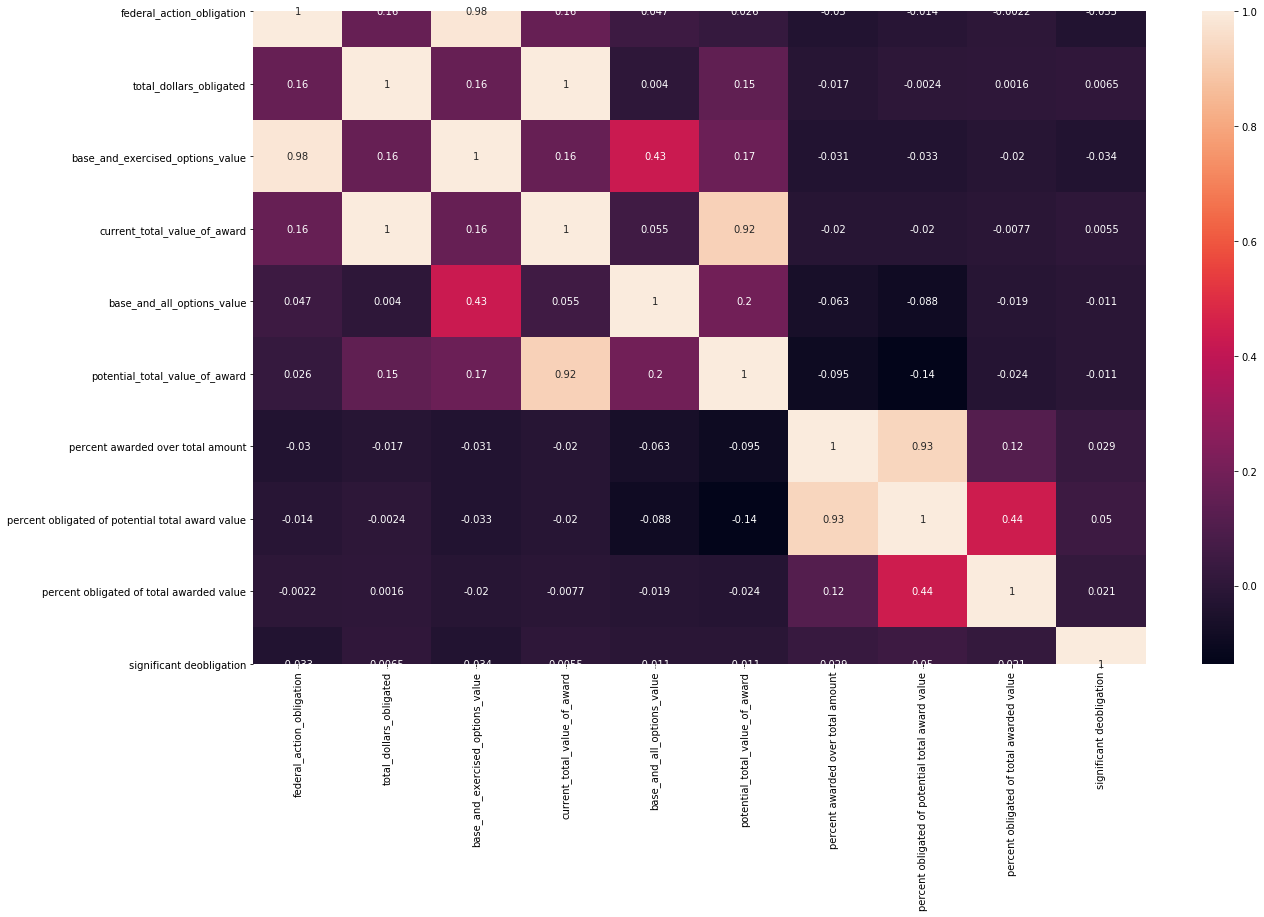

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))
sns.heatmap(key_columns.corr(), annot=True)

Looking at this heatmap we can see that there are some strong correlations between features, but not necessarily with the target variable. The feature most highly correlated is the percent obligated of total award value.

In [24]:
key_columns.fillna(0, inplace=True)
X = key_columns.drop(['significant deobligation'], axis = 1)
X.head(5)

,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,percent awarded over total amount,percent obligated of potential total award value,percent obligated of total awarded value
0,-7702.86,6003953.42,-7702.86,6059478.42,-148339.00,6067181.28,0.99873,0.989579,0.990837
1,0.00,104830.31,0.00,104830.31,0.00,104830.31,1.00000,1.000000,1.000000
2,-1566.00,2088.00,-1566.00,2088.00,-1566.00,2088.00,1.00000,1.000000,1.000000
3,0.00,1152695.02,0.00,1152695.02,0.00,1152695.02,1.00000,1.000000,1.000000
4,-2208.12,13654.38,-2208.12,13654.38,-2208.12,13654.38,1.00000,1.000000,1.000000


In [25]:
#split data into feature and target
y = key_columns['significant deobligation']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: significant deobligation, dtype: int64

I received errors when trying to run this at first with the error being "Input contains NaN, infinity or a value too large for dtype('float64')". With that said, I adjusted the code to make the NaN values **0** as a dummy set so we would know it was not real. I was weary on making it '0' but figured it was better than making it the mean as some posts suggested.

In [26]:
#train the data 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(53226, 9) (53226,)
(13307, 9) (13307,)


In [28]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
#taking a long time to run

C:\Users\jecraft\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
y_predict = svc_model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels = [1,0]))
confusion = pd.DataFrame(cm, index=['deobligated funds','obligated'],
                         columns = ['predicted significant deobligation','predicted obligated'])
print(confusion)

                   predicted significant deobligation  predicted obligated
deobligated funds                                  29                 1130
obligated                                           0                12148


1 = significant deobligation
0 = obligated (values greater than -1,000 for federal authorized amounts)

True Negative = 29 (i.e. - cases where the model is **CORRECTLY** predicting significant deobligations)
False Negative = 0 (i.e. - cases where the model **INCORRECTLY** predicts a significant deobligation as obligated)
False Positive = 1130 (i.e - cases where the model **INCORRECTLY** predicts a obligated value as a significant deobligation)
True Positive = 12148 ( i.e. - cases where the model is **CORRECTLY** predicting obligated values as obligated)

The model is not great currently due to the false positives, but it looks like it isn't running into situations where we are saying a significant deobligation occured. 

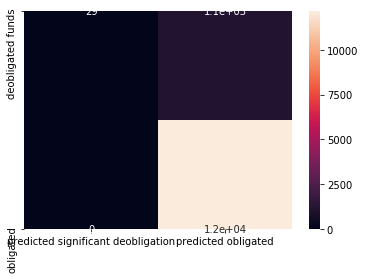

In [35]:
sns.heatmap(confusion, annot=True)

In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     12148
           1       1.00      0.03      0.05      1159

    accuracy                           0.92     13307
   macro avg       0.96      0.51      0.50     13307
weighted avg       0.92      0.92      0.88     13307



Not feeling too confident that I did this correctly but if so, this model seems to be pretty accurate!